In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
print(len(df))
df.head()

11914


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
for col in df.dtypes[df.dtypes == "object"].index:
    df[col] = df[col].str.lower().str.replace(" ", "_")

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


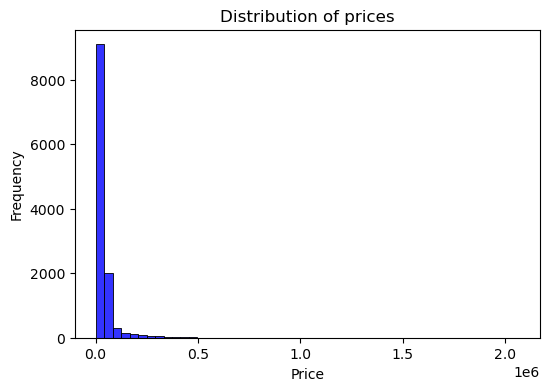

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=50, color='blue', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

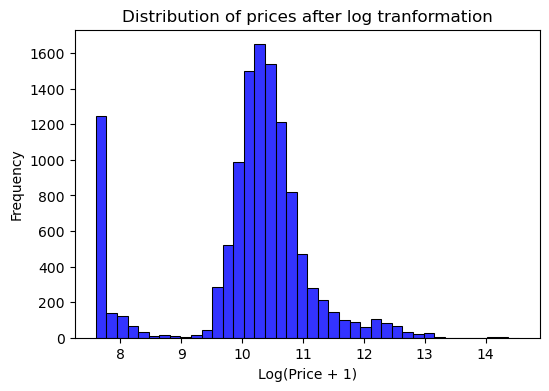

In [15]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='blue', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [5]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


# It is very important that the labels are removed from the training data otherwise 
# the model will include the labels as a feature and fit perfectly
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [6]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [7]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [8]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [9]:
def prepare_X_feature_matrix(df, num_cat_features=5):
    catagorical_values = {}

    for key in df.dtypes[df.dtypes == "object"].index:
        catagorical_values[key] = list(df[key].value_counts().index[:num_cat_features])

    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for feature_key, values in catagorical_values.items():
        for v in values:
            feature = '%s_%s' % (feature_key, v)
            df[feature] = (df[feature_key] == v).astype(int)
            features.append(feature)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [26]:
print("0 catagorical features:")

def Prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

X_train = Prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = Prepare_X(df_val)
y_pred_0 = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred_0))

0 catagorical features:
train: 0.5175055466724005
validation: 0.5172058368901952


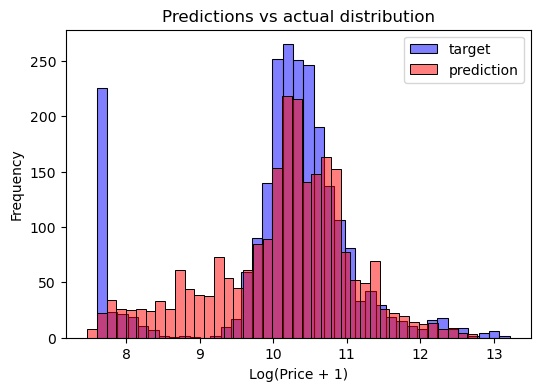

In [27]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred_0, label='prediction', color='red', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [25]:
print("3 catagorical features:")

X_train = prepare_X_feature_matrix(df_train, num_cat_features=3)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X_feature_matrix(df_val, num_cat_features=3)
y_pred_3 = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred_3))



3 catagorical features:
train: 0.47514553763619854
validation: 0.46959426427860984


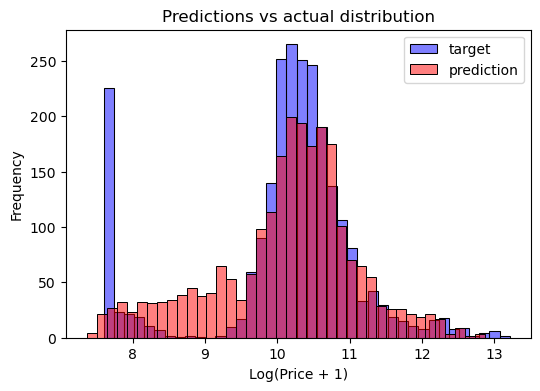

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred_3, label='prediction', color='red', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [24]:
print("8 catagorical features:")

X_train = prepare_X_feature_matrix(df_train, num_cat_features=8)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X_feature_matrix(df_val, num_cat_features=8)
y_pred_8 = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred_8))

8 catagorical features:
train: 0.45041158741626014
validation: 0.4693132866628742


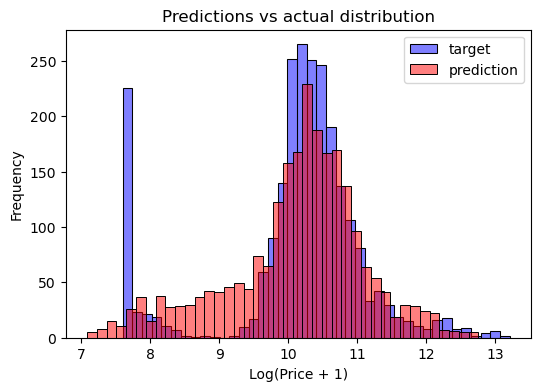

In [30]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred_8, label='prediction', color='red', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

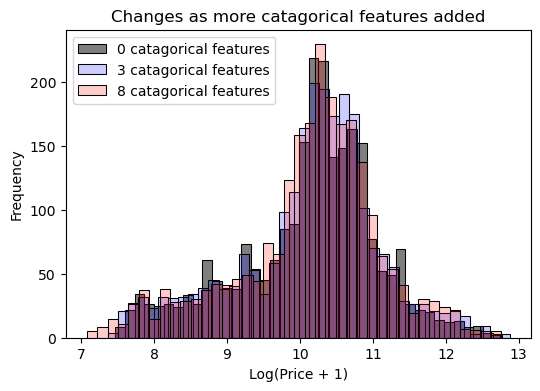

In [35]:
plt.figure(figsize=(6, 4))

sns.histplot(y_pred_0, label='0 catagorical features', color='black', alpha=0.5, bins=40)
sns.histplot(y_pred_3, label='3 catagorical features', color='blue', alpha=0.2, bins=40)
sns.histplot(y_pred_8, label='8 catagorical features', color='red', alpha=0.2, bins=40)


plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Changes as more catagorical features added')

plt.show()